<a href="https://colab.research.google.com/github/carolyn-jw/Jingwei-Wang_365/blob/main/STA365_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

url = "https://raw.githubusercontent.com/carolyn-jw/Jingwei-Wang_365/main/queue_data.csv"
queue_data = pd.read_csv(url, engine="python", sep=',', quotechar='"')

pd.DataFrame.head(queue_data, n = 10)

,arrival_time,start_time,finish_time,wait_time,queue_length
0,30-03-2023 0.10,30-03-2023 0.10,2023-03-30 00:22:44.800000000,12.68,28
1,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:53.200000000,9.82,28
2,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:48.400000000,9.74,28
3,30-03-2023 0.10,30-03-2023 0.14,2023-03-30 00:27:23.200000000,13.32,28
4,30-03-2023 0.10,30-03-2023 0.15,2023-03-30 00:31:21.400000000,16.29,28
5,30-03-2023 0.10,30-03-2023 0.20,2023-03-30 00:35:37.600000000,15.56,28
6,30-03-2023 0.10,30-03-2023 0.20,2023-03-30 00:31:56.199999999,11.87,28
7,30-03-2023 0.10,30-03-2023 0.17,2023-03-30 00:30:07.600000000,13.06,28
8,30-03-2023 0.10,30-03-2023 0.12,2023-03-30 00:25:37.600000000,13.56,28
9,30-03-2023 0.10,30-03-2023 0.18,2023-03-30 00:22:31.000000000,4.45,28


Question 1

The column that is chosen with a PyMC normal-gamma distribution is the column "wait_time" in the dataset, representing the waiting time of the customers in a restuarant.

In [5]:
with pm.Model() as normal_gamma_model:

    #Priors
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.Gamma('sigma', alpha=2, beta=1)

    observation = pm.Normal('observation', mu=mu, sigma=sigma, observed=queue_data['wait_time'])

    # Inference
    trace = pm.sample(1000, return_inferencedata=True)

Question 2

In the dataset "queue_data", there is another column "queue_length", indicating the length of the queue when the customers arrived at the restaurant, that isn't justified for narmal-gamma distribution.

Question 3

Exponential distribution is chosen here for column "queue_length"

array([[<Axes: title={'center': 'lambda'}>,
        <Axes: title={'center': 'lambda'}>]], dtype=object)

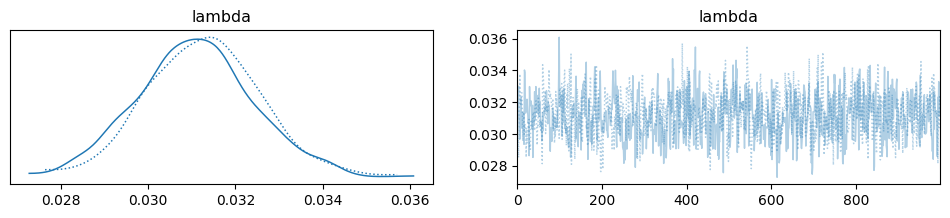

In [22]:

with pm.Model() as non_normal_model:

    # Prior
    lambda_ = pm.Exponential('lambda', 1)

    # Likelihood of observations
    observation = pm.Exponential('observation', lambda_, observed=queue_data['queue_length'])

    # Inference
    trace = pm.sample(1000, return_inferencedata=True)

# Analyzing the MCMC chains
az.plot_trace(trace)


Question 4

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


Posterior Predictive Checks (PPC): Inference data with groups:
	> posterior_predictive
	> observed_data
Effective Sample Size (ESS): <xarray.Dataset>
Dimensions:  ()
Data variables:
    lambda   float64 821.8
Summary of the posterior distribution:          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
lambda  0.031  0.001   0.029    0.034        0.0      0.0     822.0    1336.0   

        r_hat  
lambda    1.0  


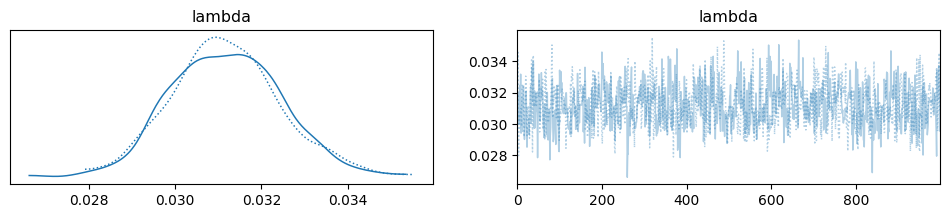

In [6]:

with pm.Model() as non_normal_model:
    # Prior
    lambda_ = pm.Exponential('lambda', 1)  # Exponential prior for the rate parameter

    # Likelihood of observations
    observation = pm.Exponential('observation', lambda_, observed=queue_data['queue_length'])

    # Inference
    trace = pm.sample(1000, return_inferencedata=True)

# Analysis of the MCMC chains
az.plot_trace(trace)

# Additional analysis

ppc = pm.sample_posterior_predictive(trace, model=non_normal_model, var_names=['observation'])

ess = az.ess(trace)

summary = az.summary(trace)


print("Posterior Predictive Checks (PPC):", ppc)
print("Effective Sample Size (ESS):", ess)
print("Summary of the posterior distribution:", summary)